In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
fig_size = (9, 3)
input_file = 'D://Repositories/covid-19-data/public/data/owid-covid-data.csv'
n = 11
group_one = ['USA', 'IND']

In [3]:
inp = pd.read_csv(input_file)
inp['daily_tests'] = inp['new_tests'].rolling(7).mean()
inp['daily_cases'] = inp['new_cases'].rolling(7).mean()
inp['daily_deaths'] = inp['new_deaths'].rolling(7).mean()
inp['daily_hosp'] = inp['hosp_patients'].rolling(7).mean()
inp['daily_deaths_change_1w'] = inp['daily_deaths'].pct_change(periods=6)*100
inp['daily_cases_change_1w'] = inp['daily_cases'].pct_change(periods=6)*100
inp['daily_hosp_change_1w'] = inp['daily_hosp'].pct_change(periods=6)*100

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['daily_deaths'].rolling(7).sum()/inp['daily_cases'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['daily_cases'].rolling(7).sum()/inp['daily_tests'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])
print(inp.columns)
inp[inp['iso_code'].isin(['OWID_WRL', 'USA', 'IND'])].groupby('iso_code').tail(1)[[
    'iso_code', 'date', 'total_cases', 'total_deaths', 'daily_cases', 'daily_deaths', 'daily_hosp',
    'daily_deaths_change_1w', 'daily_cases_change_1w', 'daily_hosp_change_1w', 'cfr', 'cfr_current']]

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

,iso_code,date,total_cases,total_deaths,daily_cases,daily_deaths,daily_hosp,daily_deaths_change_1w,daily_cases_change_1w,daily_hosp_change_1w,cfr,cfr_current
24512,IND,2021-01-13,10512093.0,151727.0,16687.857143,198.714286,NaN,-24.072052,-20.394840,0.0,1.44,1.22
57037,USA,2021-01-13,23071895.0,384653.0,245306.428571,3360.428571,NaN,20.891150,6.704013,0.0,1.67,1.30
59049,OWID_WRL,2021-01-13,92348199.0,1978614.0,729428.000000,13548.857143,NaN,17.961219,10.480391,0.0,2.15,1.79


In [4]:
top_n = inp.groupby('iso_code').tail(1).sort_values('total_cases', ascending=False).head(n)['iso_code'].tolist()
top_fifty = inp.groupby('iso_code').tail(1).sort_values('total_cases', ascending=False).head(50)['iso_code'].tolist()

In [5]:
df = inp[inp['iso_code'].isin(top_n)].groupby('iso_code').tail(1)[[
    'iso_code', 'population', 'total_cases', 'total_deaths', 'cfr', 'daily_cases_change_1w', 'daily_deaths_change_1w']]

df['cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)

df.sort_values('cases_%_world', ascending=False).set_index('iso_code')

,population,total_cases,total_deaths,cfr,daily_cases_change_1w,daily_deaths_change_1w,cases_%_world,deaths_%_world,cases_1M_pop,deaths_1M_pop
iso_code,,,,,,,,,,
OWID_WRL,7.794799e+09,92348199.0,1978614.0,2.15,10.480391,17.961219,100.000000,100.000000,11847,253
USA,3.310026e+08,23071895.0,384653.0,1.67,6.704013,20.891150,24.983590,19.440528,69703,1162
IND,1.380004e+09,10512093.0,151727.0,1.44,-20.394840,-24.072052,11.383106,7.668348,7617,109
BRA,2.125594e+08,8256536.0,205964.0,2.51,33.953798,25.968643,8.940657,10.409509,38843,968
RUS,1.459345e+08,3434934.0,62463.0,1.81,-5.963540,-0.923444,3.719546,3.156907,23537,428
GBR,6.788600e+07,3220953.0,84910.0,2.66,-6.503642,48.502994,3.487835,4.291388,47446,1250
FRA,6.527351e+07,2888292.0,69168.0,2.40,46.056193,27.202473,3.127611,3.495780,44249,1059
TUR,8.433907e+07,2355839.0,23325.0,0.98,-17.772441,-9.255242,2.551039,1.178856,27932,276
ITA,6.046183e+07,2319036.0,80326.0,3.47,3.441848,10.121328,2.511187,4.059710,38355,1328


<AxesSubplot:title={'center':'Changes from peak'}, xlabel='iso_code'>

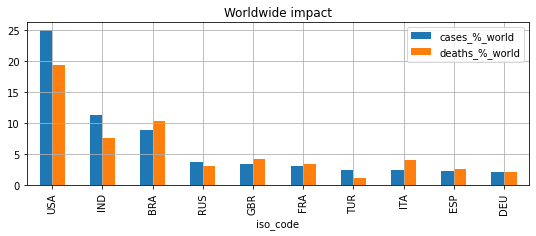

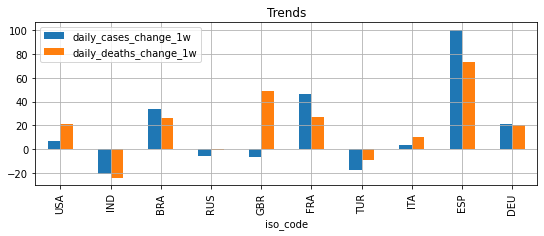

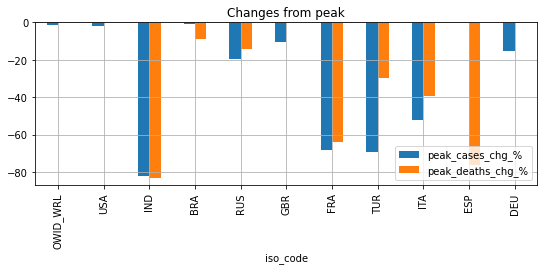

In [6]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['cases_%_world', 'deaths_%_world'], kind='bar',
    figsize=fig_size, grid=True, title='Worldwide impact')

df[df['iso_code'] != 'OWID_WRL'].sort_values('cases_%_world', ascending=False).plot(
    x='iso_code', y=['daily_cases_change_1w', 'daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Trends')

df_max = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['daily_cases', 'daily_deaths']].max()
df_last = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code')[['iso_code', 'daily_cases', 'daily_deaths']].tail(1).set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1).set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'daily_cases': 'peak_cases_chg_%','daily_deaths': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Changes from peak')

<AxesSubplot:title={'center':'Top changes from peak'}, xlabel='iso_code'>

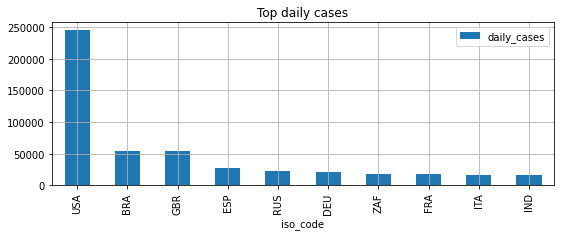

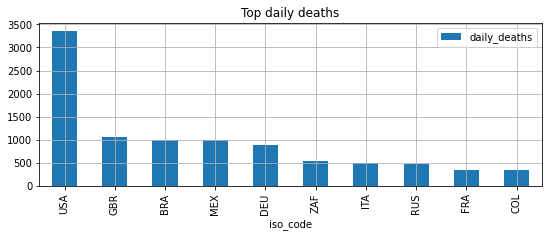

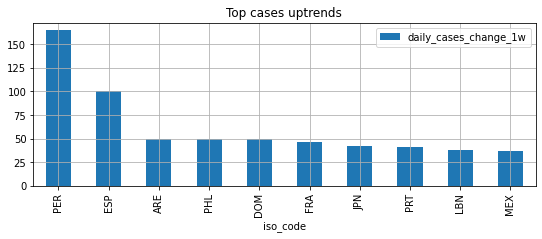

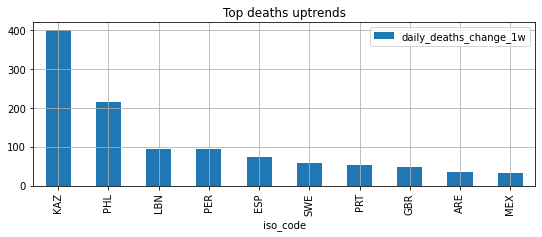

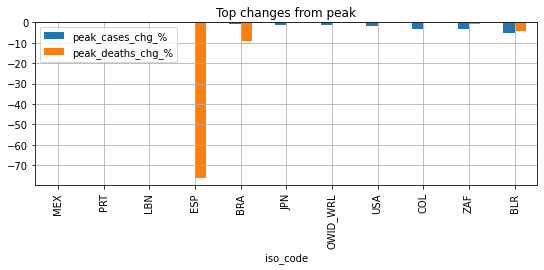

In [7]:
inp[inp['iso_code'] != 'OWID_WRL'].groupby('iso_code').tail(1)[['iso_code', 'daily_cases']].set_index('iso_code').sort_values(
    by='daily_cases', ascending=False).head(10).plot(y=['daily_cases'], kind='bar',
                                                     figsize=fig_size, grid=True, title='Top daily cases')

inp[inp['iso_code'] != 'OWID_WRL'].groupby('iso_code').tail(1)[['iso_code', 'daily_deaths']].set_index('iso_code').sort_values(
    by='daily_deaths', ascending=False).head(10).plot(y=['daily_deaths'], kind='bar',
                                                      figsize=fig_size, grid=True, title='Top daily deaths')

inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code', 'daily_cases_change_1w']].set_index('iso_code').sort_values(
    by='daily_cases_change_1w', ascending=False).head(10).plot(y=['daily_cases_change_1w'], kind='bar',
                                                               figsize=fig_size, grid=True, title='Top cases uptrends')

inp[inp['iso_code'].isin(top_fifty)].groupby('iso_code').tail(1)[['iso_code', 'daily_deaths_change_1w']].set_index('iso_code').sort_values(
    by='daily_deaths_change_1w', ascending=False).head(10).plot(y=['daily_deaths_change_1w'], kind='bar',
                                                               figsize=fig_size, grid=True, title='Top deaths uptrends')

df_pct_chg_max.sort_values(by=['peak_cases_chg_%', 'peak_deaths_chg_%', 'total_cases'], ascending=[False, False, False]).head(n).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Top changes from peak')

In [8]:
def plot_weekly_avg(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'daily_cases', 'daily_deaths', 'daily_hosp']].plot(
        x='date', y=['daily_cases', 'daily_deaths', 'daily_hosp'], secondary_y=['daily_deaths'],
        style = ['-', '--'], figsize=fig_size, grid=True, title=country)
    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_totals(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= '2020-03-01')][[
        'date', 'total_cases', 'total_deaths']].plot(
        x='date', y=['total_cases', 'total_deaths'], secondary_y=['total_deaths'],
        style = ['-', '--'], figsize=fig_size, grid=True, title=country)

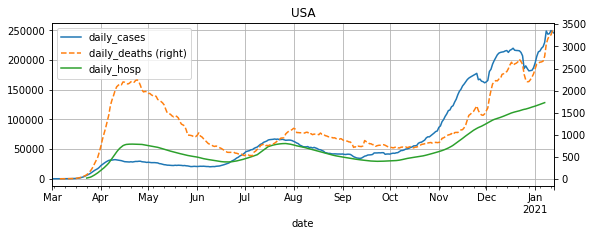

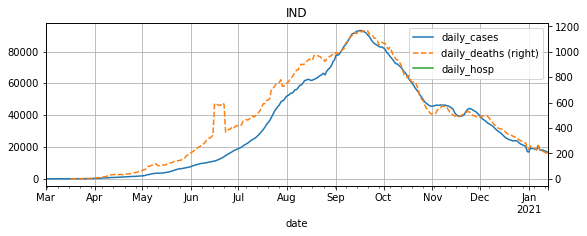

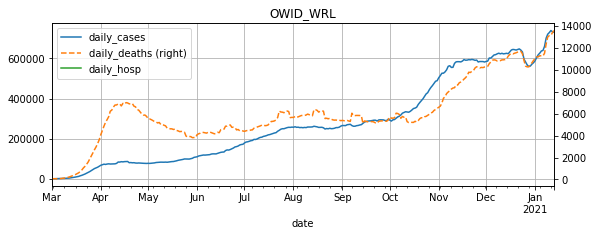

In [9]:
for country in group_one+['OWID_WRL']:
    plot_weekly_avg(inp, iso_code=country)

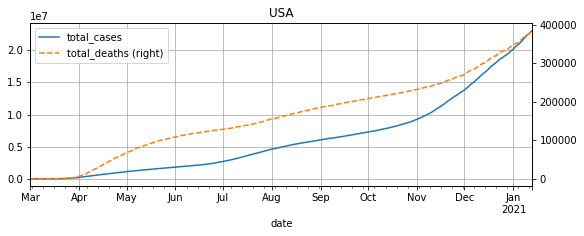

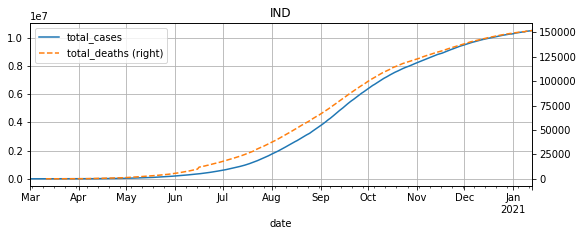

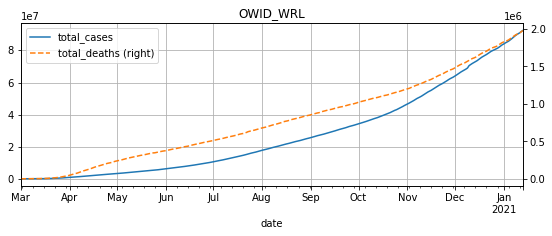

In [10]:
for country in group_one+['OWID_WRL']:
    plot_totals(inp, iso_code=country)

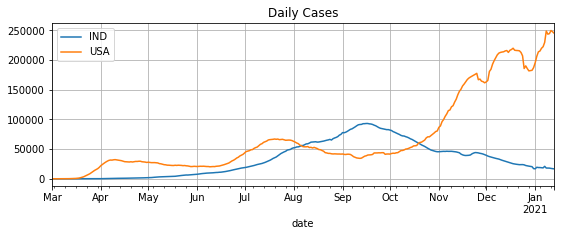

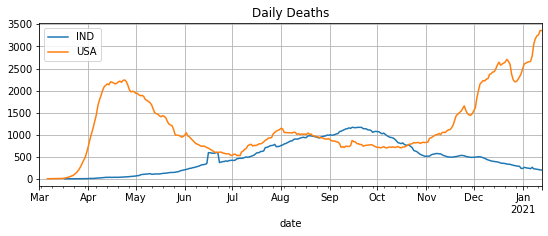

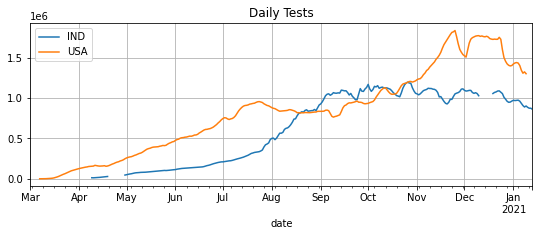

In [11]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_cases'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Cases')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_deaths'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Deaths')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['daily_tests'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Tests')
axes.legend(['IND', 'USA'])

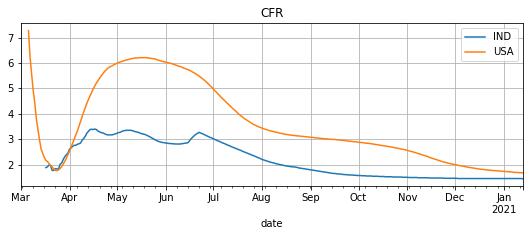

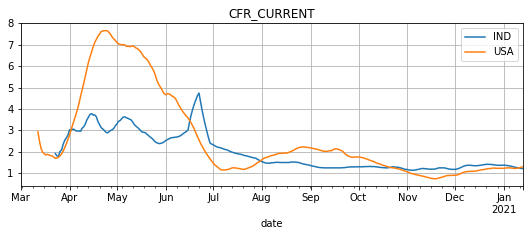

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR_CURRENT')
axes.legend(['IND', 'USA'])

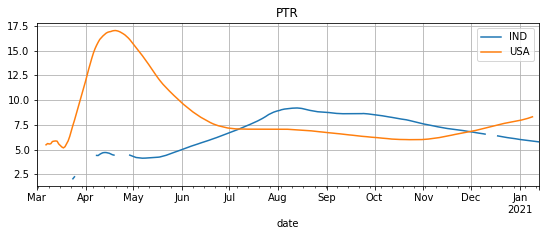

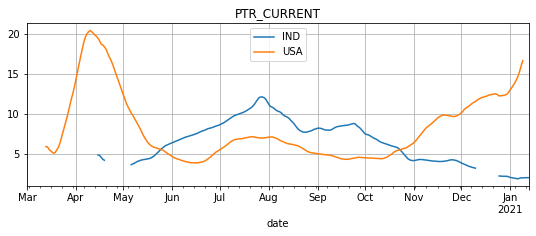

In [13]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR')
axes.legend(['IND', 'USA'])

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(['USA', 'IND'])) & (inp['date'] >= '2020-03-01')].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR_CURRENT')
axes.legend(['IND', 'USA'])